# Data Argumentation

 Data augmentation is a technique used to artificially increase the size of a training dataset by applying various transformations to the existing data. 

### Importing Dependency

In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")
import os

base_dir = "augmented_training_data"
training_path = "training_data"
os.makedirs(base_dir, exist_ok=True)
os.makedirs(os.path.join(base_dir, "Dog"), exist_ok=True)
os.makedirs(os.path.join(base_dir, "Cat"), exist_ok=True)



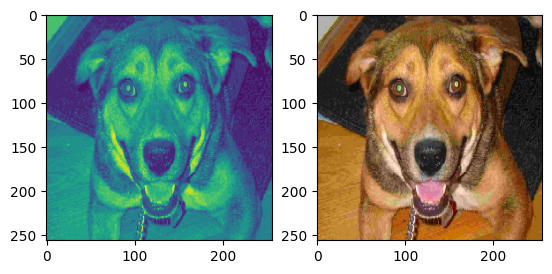

In [2]:
path = os.path.join(training_path,"Dog\dog.99.jpg")
img_path = os.path.join(path)
plt.subplot(1,2,1)
img = image.load_img(img_path,target_size=(256,256),color_mode = "grayscale")
plt.imshow(img)
plt.subplot(1,2,2)
img = image.load_img(img_path,target_size=(256,256))
plt.imshow(img)
plt.show()

In [3]:
img_arr = image.img_to_array(img)
print(img_arr.shape)

(256, 256, 3)


In [4]:
final_img = img_arr.reshape(1,256,256,3)
final_img.shape

(1, 256, 256, 3)

In [5]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

## Making code more productive by making it a Function 

In [6]:
def argumentation(data_path,save_path,no_of_copies,save_name):
    for x in os.listdir(data_path):
        path  = f"{data_path}\{x}"
        img_ = image.load_img(path,target_size=(256,256),)
        img_arr_ = image.img_to_array(img_)
        final_img_ = img_arr_.reshape((1,) + img_arr_.shape)

        i = 0
        for batch in datagen.flow(final_img_,
                              save_to_dir=save_path, save_prefix=save_name, save_format='jpeg'):
            i += 1
            if i >= no_of_copies:
                break  
    print(" *** Argumentation Done *** ")

### Dog Images Argumentation

In [7]:
data_dog = os.path.join(training_path, "Dog")
save_dog_path=os.path.join(base_dir, "Dog")

In [8]:
print("Number of Image before Argumentation : ",len(os.listdir(data_dog)))

Number of Image before Argumentation :  4008


In [9]:
argumentation( data_path=data_dog , save_path=save_dog_path ,  no_of_copies=5 , save_name="dog")

 *** Argumentation Done *** 


In [10]:
print("Number of Image after Argumentation : ",len(os.listdir(save_dog_path)))

Number of Image after Argumentation :  8660


### Cat Images Argumentation

In [11]:
data_cat = os.path.join(training_path, "Cat")
save_cat_path=os.path.join(base_dir, "Cat")


In [12]:
print("Number of Image before Argumentation : ",len(os.listdir(data_cat)))

Number of Image before Argumentation :  3996


In [13]:
argumentation(  data_path=data_cat , save_path=save_cat_path ,  no_of_copies=5 , save_name="cat")

 *** Argumentation Done *** 


In [14]:
print("Number of Image after Argumentation : ",len(os.listdir(save_cat_path)))

Number of Image after Argumentation :  8656


## The End...